<a href="https://colab.research.google.com/github/ethandsz/Life-Expectancy-Analysis/blob/main/LifeExpectancy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Info
#DataSet used: https://www.kaggle.com/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv

In [ ]:
url = 'https://www.kaggle.com/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ethandsz
Your Kaggle Key: ··········


100%|██████████| 119k/119k [00:00<00:00, 14.0MB/s]

In [ ]:
life_exp = pd.read_csv('life-expectancy-who/Life Expectancy Data.csv')

In [ ]:
life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Exploring Columns

In [ ]:
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Renaming Columns for ease of use

In [ ]:
life_exp.rename(columns = {'Life expectancy ':'Life_expectancy', 
                           'Adult Mortality':'Adult_Mortality',
                           'percentage expenditure':'percentage_expenditure',
                           'Hepatitis B':'Hepatitis_B',
                           'Measles ':'Measles',
                           ' BMI ': 'BMI',
                          'under-five deaths ':'under-five_deaths',
                          'Total expenditure': 'Total_expenditure',
                           'Diphtheria ':'Diphtheria',
                           ' HIV/AIDS':'HIV/AIDS',
                           ' thinness  1-19 years':'thinness_1-19_years',
                           ' thinness 5-9 years':'thinness_5-9_years',
                           'Income composition of resources':'Income_composition_of_resources'}, inplace = True);
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Getting Info for each column

In [ ]:
life_exp.describe() #Describes mathematical numerical info for each column

,Year,Life_expectancy,Adult_Mortality,infant deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Cleaning Data and inserting NaN or Null values and performing exploratory analysis

Checking too see if any values is null

In [ ]:
life_exp.isnull().values.any() #Checking if any values in the dataframe are null or NaN

True

Since Previous expression was true, I look too see which columns contain null values and how many

In [ ]:
life_exp.isnull().sum() #Checking the sums of the null or NaN values by individual columns 

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

Checking which countries contain Null values for the Life Expectancy Column

In [ ]:
life_exp[life_exp.Life_expectancy.isnull()][['Life_expectancy', 'Country']] 

,Life_expectancy,Country
624,NaN,Cook Islands
769,NaN,Dominica
1650,NaN,Marshall Islands
1715,NaN,Monaco
1812,NaN,Nauru
1909,NaN,Niue
1958,NaN,Palau
2167,NaN,Saint Kitts and Nevis
2216,NaN,San Marino
2713,NaN,Tuvalu


Getting mean of life expectancy throughout the dataset to update the null values

In [ ]:
avg_life_expectancy = life_exp.Life_expectancy.mean()

Setting null values to the average rate

In [ ]:
life_exp.loc[life_exp['Life_expectancy'].isnull(),['Life_expectancy']] = avg_life_expectancy

Checking too ensure no values are null

In [ ]:
life_exp[life_exp.Life_expectancy.isnull()][['Life_expectancy']].sum()

Life_expectancy    0.0
dtype: float64

Same procedure is being done as above, except now for Adult Mortality

In [ ]:
life_exp[life_exp.Adult_Mortality.isnull()][['Adult_Mortality', 'Country', 'Year']]

,Adult_Mortality,Country,Year
624,NaN,Cook Islands,2013
769,NaN,Dominica,2013
1650,NaN,Marshall Islands,2013
1715,NaN,Monaco,2013
1812,NaN,Nauru,2013
1909,NaN,Niue,2013
1958,NaN,Palau,2013
2167,NaN,Saint Kitts and Nevis,2013
2216,NaN,San Marino,2013
2713,NaN,Tuvalu,2013


In [ ]:
avg_adult_mortality = life_exp.Adult_Mortality.mean()

life_exp.loc[life_exp.Adult_Mortality.isnull(), ['Adult_Mortality']] = avg_adult_mortality

In [ ]:
life_exp[life_exp.Adult_Mortality.isnull()][['Adult_Mortality']].sum()

Adult_Mortality    0.0
dtype: float64

In [ ]:
life_exp[life_exp.BMI.isnull()][['Country']].drop_duplicates() #Dropping duplicates of BMI values to see which countries have null values

,Country
1715,Monaco
2216,San Marino
2409,South Sudan
2457,Sudan


Information for Sudan gathered from here: https://en.wikipedia.org/wiki/List_of_countries_by_body_mass_index

In [ ]:
avg_bmi = life_exp.BMI.mean()

life_exp.loc[(life_exp.BMI.isnull()) & (life_exp.Country == "Monaco"), ['BMI']] = avg_bmi
life_exp.loc[(life_exp.BMI.isnull()) & (life_exp.Country == "San Marino"), ['BMI']] = avg_bmi
life_exp.loc[(life_exp.BMI.isnull()) & (life_exp.Country == "South Sudan"), ['BMI']] = 25.2
life_exp.loc[(life_exp.BMI.isnull()) & (life_exp.Country == "Sudan"), ['BMI']] = 25.2

In [ ]:
life_exp[life_exp.BMI.isnull()][['Country']].drop_duplicates().sum()

Country    0.0
dtype: float64

Polio and Diphtheria null values will be equal to the average values for each corresponding column

In [ ]:
avg_polio = life_exp.Polio.mean()
life_exp.loc[life_exp.Polio.isnull(), ['Polio']] = avg_polio

avg_dip = life_exp.Diphtheria.mean()
life_exp.loc[life_exp.Diphtheria.isnull(), ['Diphtheria']] = avg_dip

In [ ]:
life_exp.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                  0
under-five_deaths                    0
Polio                                0
Total_expenditure                  226
Diphtheria                           0
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

Exploring Column values


In [ ]:
print("The average life expectancy rate for all countries is {:.1f}\n".format(life_exp.Life_expectancy.mean()))
print("The number of Developing countries is {}\n".format(life_exp[life_exp.Status == "Developing"]['Status'].count()))
print("The number of Developed countries is {}".format(life_exp[life_exp.Status == "Developed"]['Status'].count()))


The average life expectancy rate for all countries is 69.2

The number of Developing countries is 2426

The number of Developed countries is 512


#Plotting Life Expectancy of all countries by Year

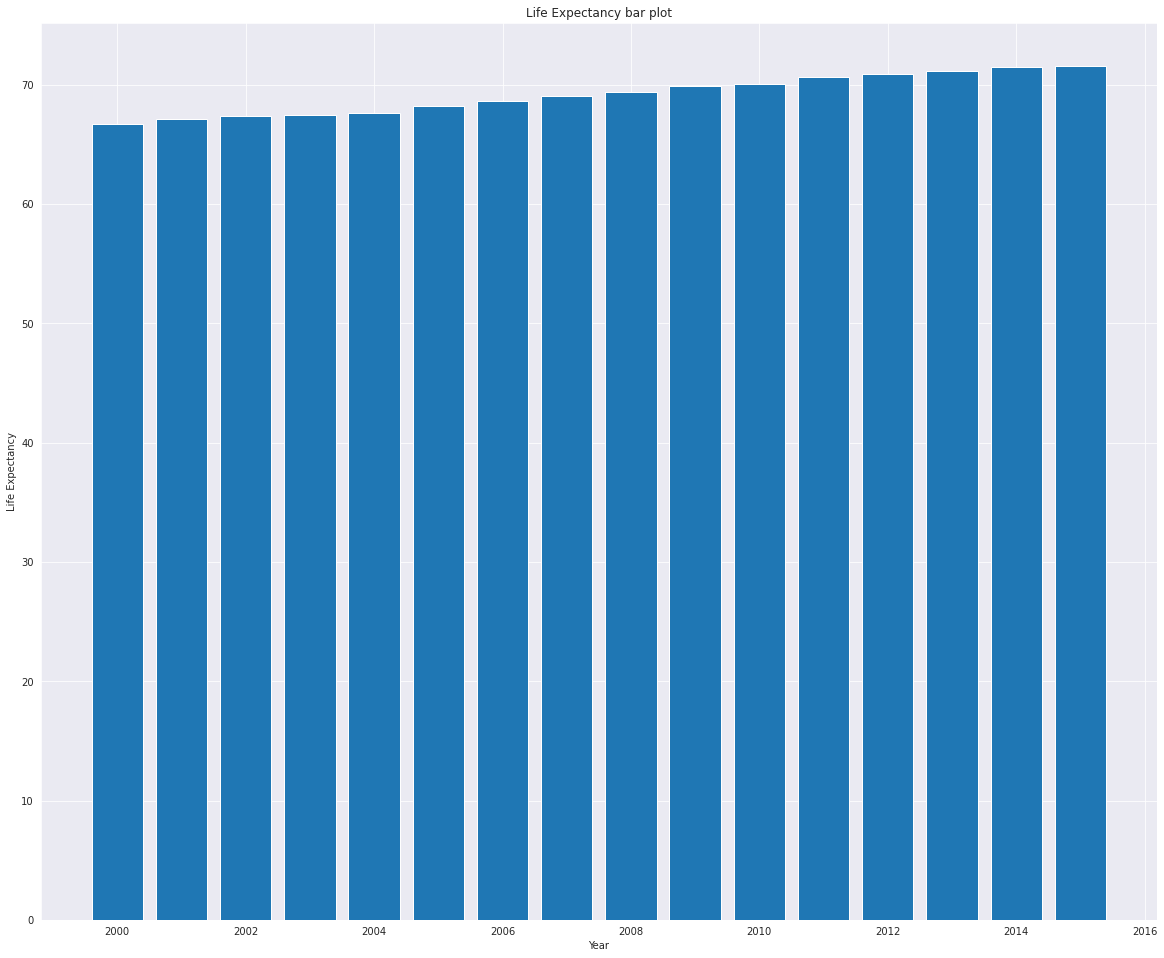

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize = (20,16.5))
plt.bar(np.arange(2000,2016), life_exp.groupby('Year')['Life_expectancy'].mean());

plt.title("Life Expectancy bar plot")

plt.xlabel("Year")
plt.ylabel("Life Expectancy");

#Plotting a barplot using the matplotlib library 

# Exploring correlations between columns

Plotting a heatmap too see the correlations between different numerical values in the dataframe. 

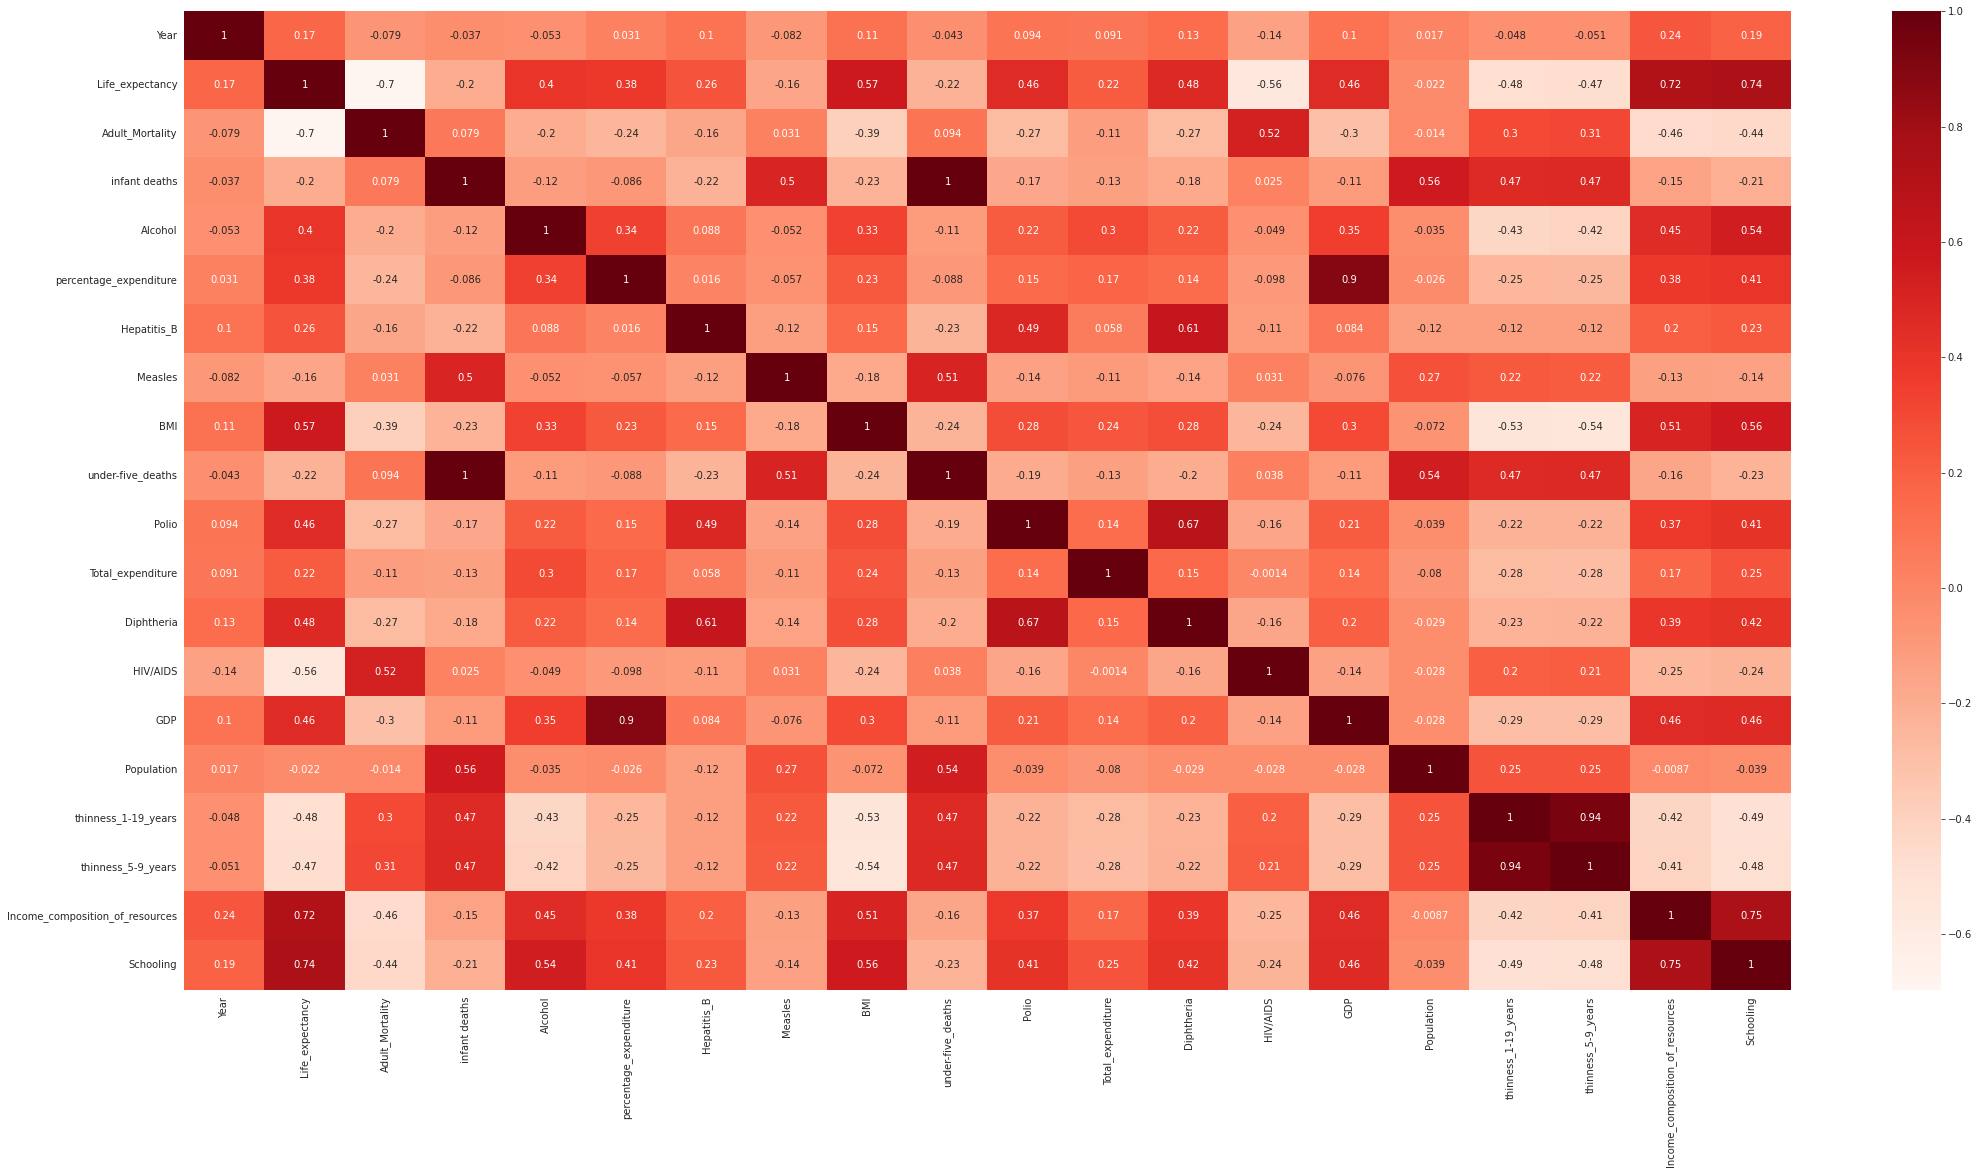

In [ ]:
plt.figure(figsize = (36,18))

sns.heatmap(life_exp.corr(), cmap = 'Reds', annot = True);

#plotting a heatmap of correlations between numerical columns, using the seaborn library 

# Questions???

QUESTIONS: 

1) Do Developed countries have a higher life expectancy than that of developing countries?

2) Do Developed Nations have a higher scooling rate than that of developing countries?

3) Does a higher alcohol rate result in a lower life expectancy?

4) Do Schooling and Life Expectancy have a linear relationship?

# Do Developed countries have a higher life expectancy than that of developing countries?

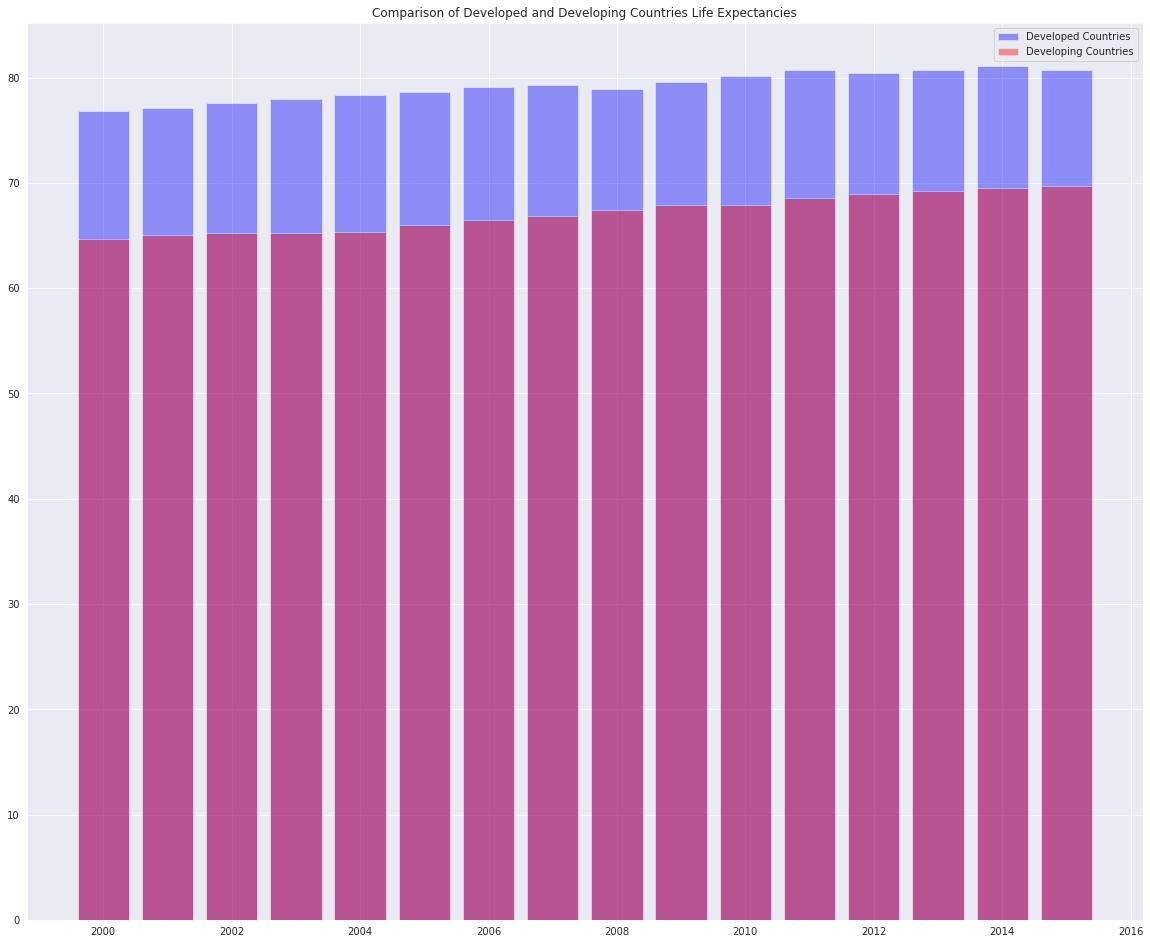

In [ ]:
developed_nations = life_exp[life_exp.Status == "Developed"]
developing_nations = life_exp[life_exp.Status == "Developing"]

developed_rate = developed_nations.groupby('Year')['Life_expectancy'].mean()
developing_rate = developing_nations.groupby('Year')['Life_expectancy'].mean()

plt.figure(figsize = (20,16.5))

plt.bar(np.arange(2000,2016),developed_rate, alpha = 0.4, color = 'Blue')
plt.bar(np.arange(2000,2016),developing_rate, alpha = 0.4, color = 'Red') 

plt.legend(['Developed Countries', 'Developing Countries'])
plt.title("Comparison of Developed and Developing Countries Life Expectancies");

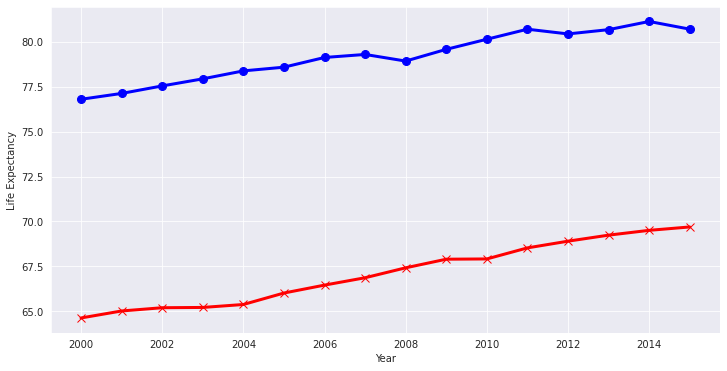

In [ ]:
plt.figure(figsize = (12,6))

plt.plot(np.arange(2000,2016),developed_rate, 'o-b', linewidth = 3, markersize = 8)
plt.plot(np.arange(2000,2016),developing_rate, 'x-r', linewidth = 3, markersize = 8)

plt.xlabel("Year")
plt.ylabel("Life Expectancy");

QUESTION:

1) Do Developed countries have a higher life expectancy than that of developing countries?

ANSWER: 

From the data analysis above we can conclude the average life expectancy of developed countires is higher than that of developing countries

# Do Developed Nations have a higher scooling rate than that of developing countries?

In [ ]:
#Checking the number of developed countries vs developing countries
developed_size = life_exp[life_exp.Status == 'Developed']['Country'].unique().size
developing_size = life_exp[life_exp.Status == 'Developing']['Country'].unique().size
#Checking the number of developed and developing countries using the unique function from pandas

print("Number of developed: countries {}".format(developed_size))
print("Number of developing: countries {}".format(developing_size))

Number of developed: countries 32
Number of developing: countries 161


In [ ]:
developed_nations_fulldf = life_exp[life_exp.Status == "Developed"]
developing_nations_fulldf = life_exp[life_exp.Status == "Developing"]

Plot of Developed Countries Schooling rate

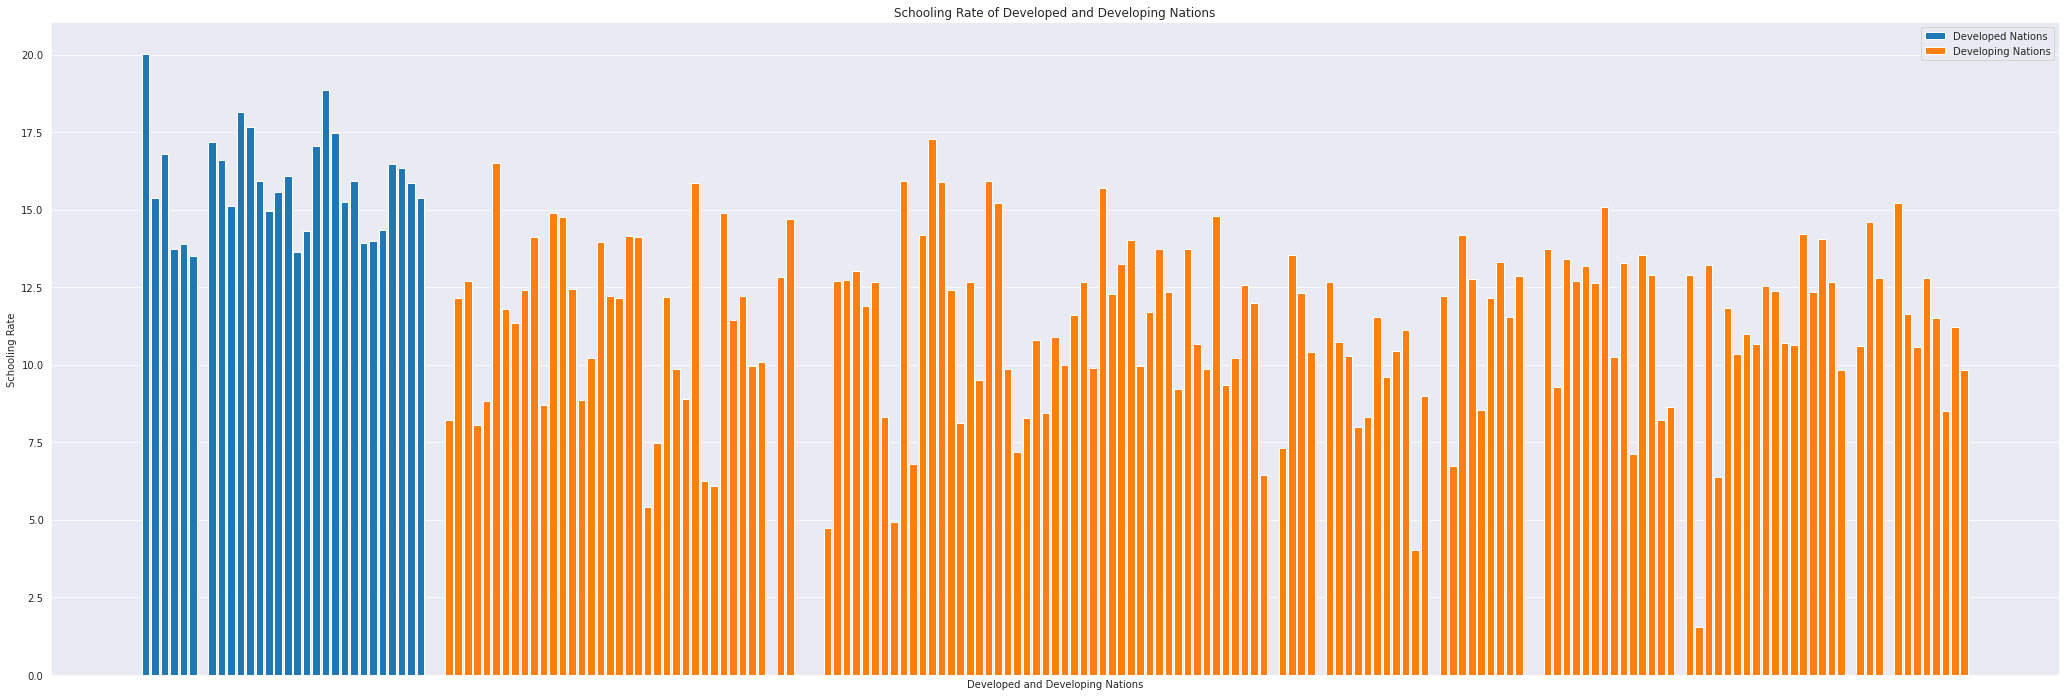

In [ ]:
plt.figure(figsize = (36,12))

plt.bar(developed_nations_fulldf.groupby("Country")["Schooling"].mean().index, 
        developed_nations_fulldf.groupby("Country")["Schooling"].mean())

plt.bar(developing_nations_fulldf.groupby("Country")["Schooling"].mean().index, 
        developing_nations_fulldf.groupby("Country")["Schooling"].mean())

plt.xticks([]) #Removing the xvalues in this case the labels of all countires to prevent cluttering of the chart on the xticks. 

plt.legend(["Developed Nations", "Developing Nations"])
plt.title("Schooling Rate of Developed and Developing Nations")

plt.xlabel("Developed and Developing Nations")
plt.ylabel("Schooling Rate");

In [ ]:
developed_nations_fulldf.groupby("Country")["Schooling"].mean().sum()/developed_size
developing_nations_fulldf.groupby("Country")["Schooling"].mean().sum()/developing_size

10.443594720496895

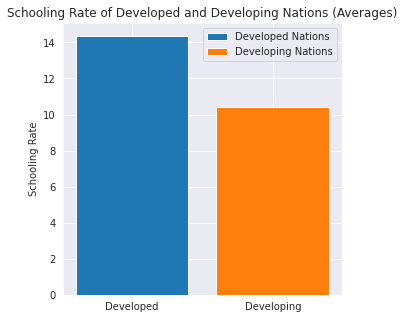

In [ ]:
plt.figure(figsize = (5,5))

plt.bar(["Developed"],developed_nations_fulldf.groupby("Country")["Schooling"].mean().sum()/developed_size)
plt.bar(["Developing"],developing_nations_fulldf.groupby("Country")["Schooling"].mean().sum()/developing_size)

plt.legend(["Developed Nations", "Developing Nations"])
plt.title("Schooling Rate of Developed and Developing Nations (Averages)")

plt.ylabel("Schooling Rate");

QUESTION:

Do Developed Nations have a higher scooling rate than that of developing countries?

ANSWER: 

From the data analysis performed above we can conclude that there is a higher schooling rate amonght developed nations than that of developing nations.

# Does a higher alcohol rate result in a lower life expectancy?

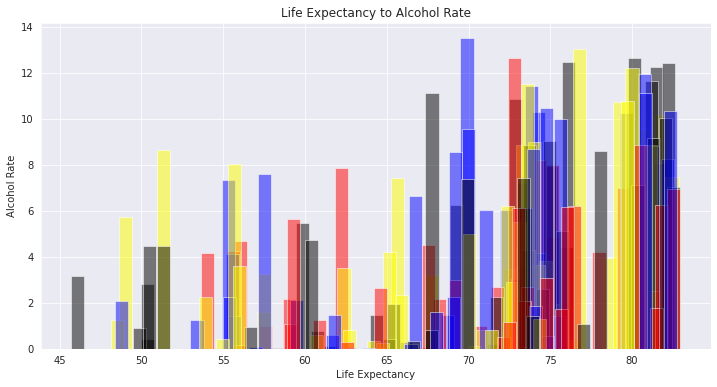

In [ ]:
plt.figure(figsize = (12,6))

alcohol_life_exp = life_exp.groupby('Country')[['Alcohol','Life_expectancy']].mean()


plt.bar(alcohol_life_exp.Life_expectancy,alcohol_life_exp.Alcohol,color = ('black','red','blue','yellow'), alpha = 0.5)

plt.xlabel("Life Expectancy")
plt.ylabel("Alcohol Rate")

plt.title("Life Expectancy to Alcohol Rate");


In [ ]:
alcohol_life_exp = life_exp.groupby('Country')[['Alcohol','Life_expectancy']].mean()
alcohol_life_exp

,Alcohol,Life_expectancy
Country,,
Afghanistan,0.014375,58.19375
Albania,4.848750,75.15625
Algeria,0.406667,73.61875
Angola,5.740667,49.01875
Antigua and Barbuda,7.949333,75.05625
...,...,...
Venezuela (Bolivarian Republic of),7.420000,73.38750
Viet Nam,3.087333,74.77500
Yemen,0.047333,63.86250


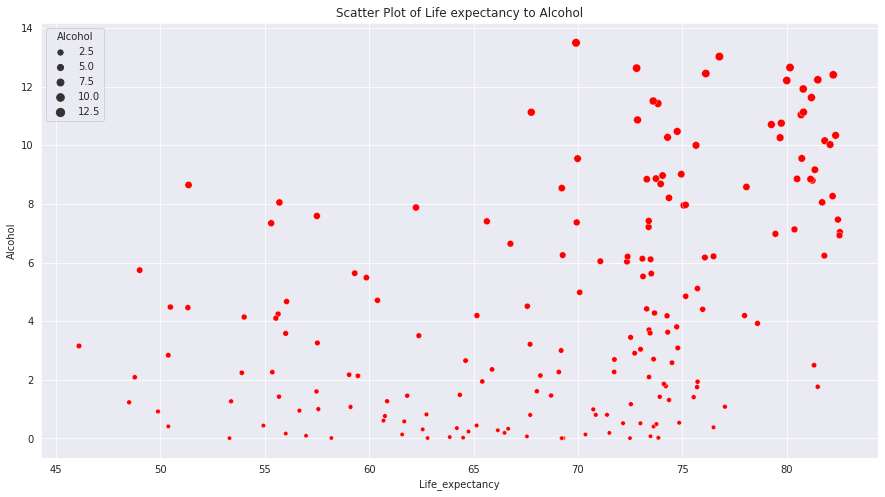

In [ ]:
plt.figure(figsize = (15,8))

sns.scatterplot(x='Life_expectancy',y='Alcohol', color = 'red', size = 'Alcohol', data=alcohol_life_exp)

plt.title("Scatter Plot of Life expectancy to Alcohol");

#Using a scatter plot from the seaborn library to try and visualize if there is any correlation between life expectancy and alcohol rate

QUESTION: 

Does a higher alcohol rate result in a lower life expectancy?

ANSWER:

From our data analysis above it looks like a higher alcohol rate does not share a direct correlation with the life expectancy rate. 


# Do Schooling and Life Expectancy have a linear relationship?

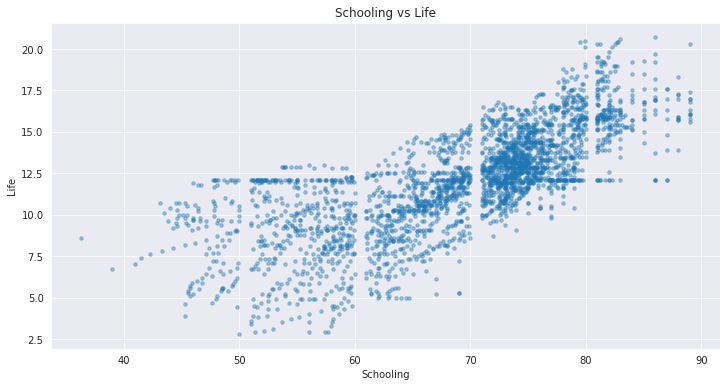

In [ ]:
plt.figure(figsize = (12,6))

plt.scatter(life_exp.Life_expectancy, life_exp.Schooling, s = 12, alpha = 0.4)

plt.xlabel('Schooling')
plt.ylabel('Life')

plt.title('Schooling vs Life');

From the figure above we can see that there is a linear relationship between schooling and life expectancy. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

Importing the LinearRegression function from sklearn to create a model of the linear relationship between life expectancy and schooling

In [ ]:
inputs = life_exp[['Life_expectancy']]
target = life_exp.Schooling

Creating inputs and targets to fit the model

In [ ]:
target.loc[target.isna()] = target.mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Inserting values in target for currently null values to prevent issues when fitting the model

In [ ]:
target.isnull().sum()

0

In [ ]:
model.fit(inputs, target)

LinearRegression()

Fitting the model

In [ ]:
preds = model.predict(inputs)
preds


array([11.10867012,  9.89535624,  9.89535624, ...,  6.30299554,
        6.42194788,  6.58848116])

Creating predictions using the inputs provided earlier

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(predictions - targets)))

In [ ]:
rmse(target, preds)

2.038015816271699

Loss of the function using the Root Mean Squared Error 

Model Loss 2.04


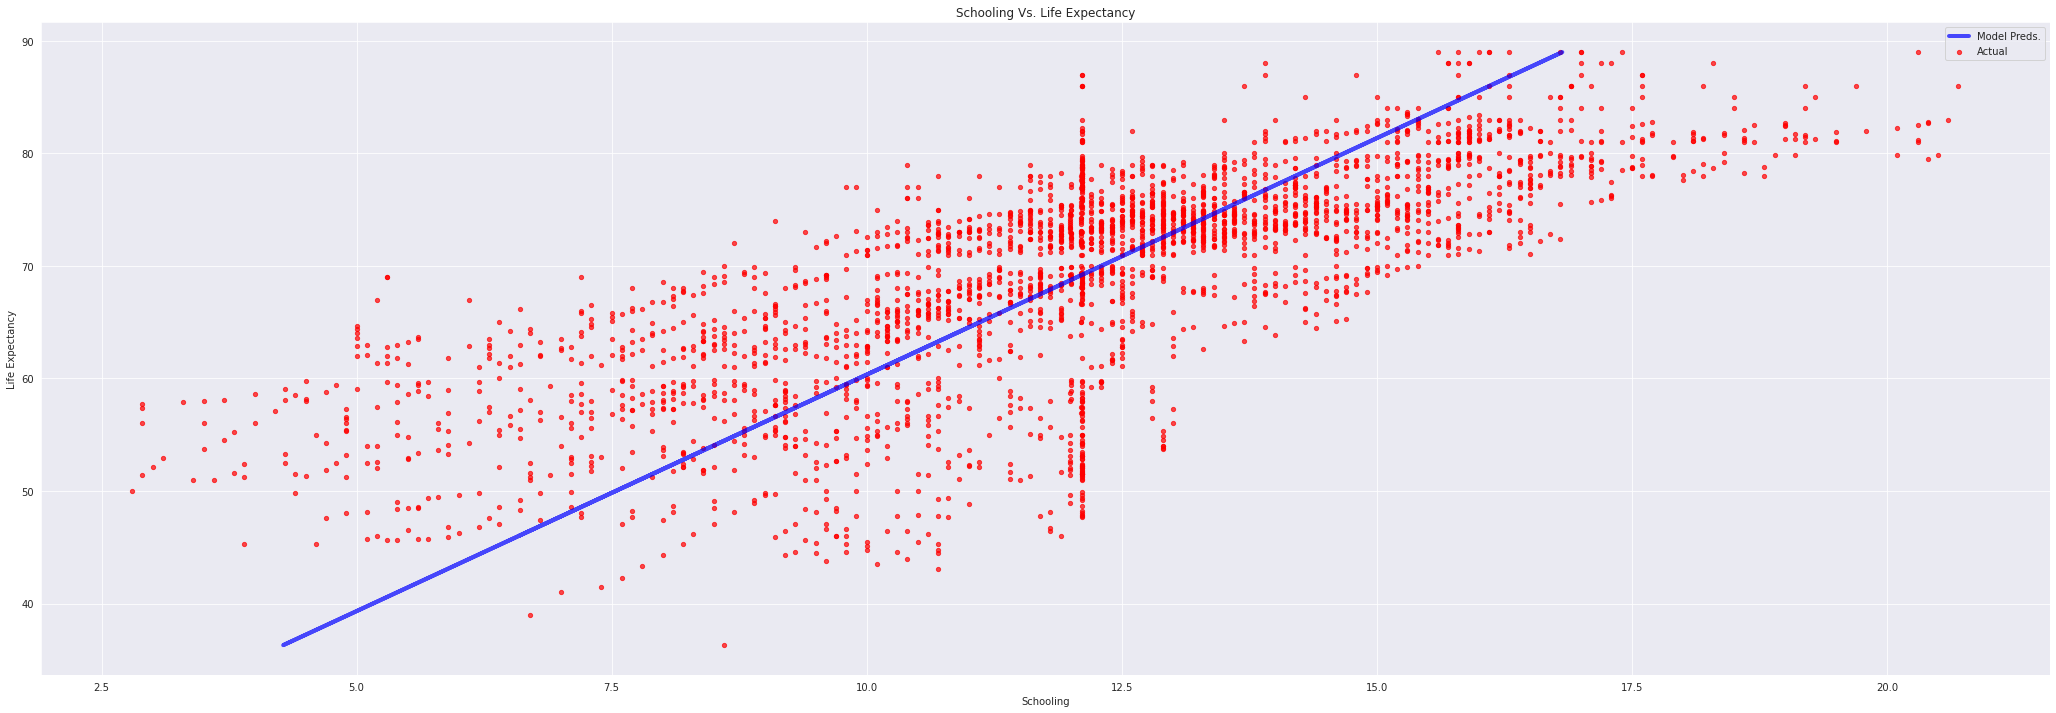

In [ ]:
plt.figure(figsize = (36,12))

plt.scatter(target, life_exp.Life_expectancy, alpha = 0.7, s = 18,  color = 'r')
plt.plot(preds,life_exp.Life_expectancy,'b', linewidth = 4, alpha = 0.7,)

plt.legend(['Model Preds.', 'Actual'])

plt.title('Schooling Vs. Life Expectancy')

plt.xlabel('Schooling')
plt.ylabel('Life Expectancy');

print("Model Loss {:.2f}".format(rmse(target, preds)))

QUESTION: 

Do Schooling and Life Expectancy have a linear relationship?

ANSWER:

From our data analysis above it seems that schooling and life expectancy share a linear relationship, however the conclusion that a higher schooling rate means a higher life expectancy is not right because developed nations have a higher schooling rate aswell as a higher life expectancy rate.